In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/zadanie4/train.csv")
data

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,class,fnlwgt,education,education-num,relationship,capital-gain,capital-loss,hours-per-week,date_of_birth,personal_info
0,0,72.0,F,t,f,f,f,f,f,f,...,replacement therapy.|3560,140581,Some-college,1000,Unmarried,0.0,0,40,1946-02-03,Other-service|United-States\nWidowed -- privat...
1,1,52.0,F,f,f,f,f,f,f,f,...,negative.|311,180916,Some-college,10,Unmarried,0.0,0,38,1965-08-27,Adm-clerical|United-States\nSeparated -- Local...
2,2,62.0,M,F,f,f,f,f,f,f,...,negative.|3705,235853,HS-grad,-900,Husband,0.0,0,45,1955-04-15,Sales|United-States\nMarried-civ-spouse -- pri...
3,3,23.0,F,f,f,f,f,f,f,f,...,negative.|2668,121889,Some-college,10,Own-child,0.0,0,20,1994-03-26,Sales|United-States\nNever-married -- Private|...
4,4,63.0,F,t,f,f,f,f,f,f,...,replacement therapy.|1668,222490,Assoc-voc,11,Own_child,0.0,0,40,1955-01-21,Adm-clerical|United-States\nNever-married -- P...
5,5,56.0,F,f,f,f,f,f,f,f,...,negative.|2650,256191,HS-grad,9,Own-child,0.0,0,25,1961-12-10,?|United-States\nNever-married -- ?|Black
6,6,84.0,F,f,f,f,f,f,f,f,...,negative.|1485,203505,HS-grad,9,Not-in-family,0.0,0,40,1934-03-03,Adm-clerical|United-States\nWidowed -- Federal...
7,7,68.0,?,f,f,f,f,f,f,f,...,negative.|281,147202,Some-college,-1000,Not-in-family,0.0,0,45,1949-07-21,Adm-clerical|Germany\nDivorced -- Private|White
8,8,19.0,M,f,f,f,f,f,f,f,...,negative.|764,85625,Some-college,1000,Not-in-family,0.0,0,20,1999-01-06,Sales|United-States\nNever-married -- Private|...
9,9,72.0,M,F,f,f,f,f,f,f,...,negative.|390,129172,Some-college,10,Own-child,0.0,0,16,1945-11-10,Other-service|United-States\nNever-married -- ...


# Názvy atribútov (stĺpcov)

In [3]:
for name in data.columns:
    print(name)

Unnamed: 0
age
sex
on thyroxine
query on thyroxine
on antithyroid medication
sick
pregnant
thyroid surgery
I131 treatment
query hypothyroid
query hyperthyroid
lithium
goitre
tumor
hypopituitary
psych
TSH measured
TSH
T3 measured
T3
TT4 measured
TT4
T4U measured
T4U
FTI measured
FTI
TBG measured
TBG
referral source
class
fnlwgt
education
education-num
relationship
capital-gain
capital-loss
hours-per-week
date_of_birth
personal_info


# Počet riadkov a stĺpcov

In [4]:
print(f"Počet riadkov: \t\t\t {data.shape[0]}")
print(f"Počet stĺpcov (atribútov): \t {data.shape[1]}")

Počet riadkov: 			 2800
Počet stĺpcov (atribútov): 	 40


# Počet riadkov a stĺpcov, ktoré majú aspoň jednu prázdnu hodnotu

## Počet riadkov s prázdnymi hodnotami

In [5]:
# data.shape[0] vráti celkový počet riadkov
# data.dropna() odstráni všetky riadky s prázdnymi hodnotami
# data.dropna().shape[0] - takto sme dostali počet riadkov, ktoré nemajú prázdne hodnoty
data.shape[0] - data.dropna().shape[0]

1100

## Počet stĺpcov s prázdnymi hodnotami

In [6]:
data.shape[1] - data.dropna(axis=1).shape[1]

7

# Deskriptívne štatistiky

In [7]:
data.describe()

,Unnamed: 0,age,TSH,T3,TT4,T4U,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,2800.000000,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2.800000e+03,2800.000000,2520.000000,2800.000000,2800.000000
mean,1399.500000,51.84423,4.672150,2.024966,109.072401,0.997912,1.871231e+05,9.206429,881.830952,65.141786,38.544643
std,808.434702,20.46116,21.449453,0.824600,35.392443,0.194390,1.039134e+05,330.254790,6921.674828,346.739277,12.039004
min,0.000000,1.00000,0.005000,0.050000,2.000000,0.310000,1.970000e+04,-1600.000000,0.000000,0.000000,1.000000
25%,699.750000,36.00000,0.440000,1.600000,88.000000,0.880000,1.179575e+05,9.000000,0.000000,0.000000,35.000000
50%,1399.500000,54.00000,1.400000,2.000000,104.000000,0.980000,1.766680e+05,10.000000,0.000000,0.000000,40.000000
75%,2099.250000,67.00000,2.600000,2.400000,125.000000,1.080000,2.326778e+05,13.000000,0.000000,0.000000,40.000000
max,2799.000000,455.00000,478.000000,10.600000,430.000000,2.120000,1.161363e+06,1600.000000,99999.000000,4356.000000,99.000000


# Dátové typy v jednotlivých stĺpcoch

In [8]:
data.dtypes

Unnamed: 0                     int64
age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                           object
T

# Problémy v dátach

Dáta v stĺpcoch od "on thyroxine" do  ... sú nekonzistentné - rôzne vyjadrené True a False hodnoty. Tieto hodnoty musíme upraviť do tvaru True/False.

In [9]:
for item in data["on thyroxine"].unique():
    print(item)

t
f
F
FALSE
T
TRUE


Dáta v stĺpci education-num majú veľmi odľahlé krajné hodnoty

1000
10
-900
11
9
-1000
16
1100
13
8
2
7
6
-1300
14
15
5
1
12
900
1400
4
-1400
400
-400
3
800
600
1300
-700
-1500
1200
-600
-1100
500
1600
-1600
-800
-500
-1200
1500
700
-300


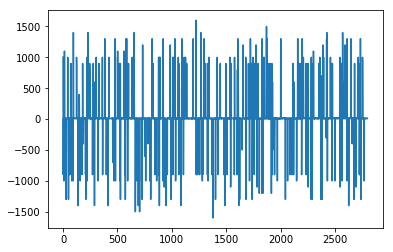

In [14]:
for item in data["education-num"].unique():
    print(item)
    
data["education-num"].plot(kind="line")

Stĺpec "TBG" neobsahuje žiadne zmysluplné hodnoty. Tento stĺpec tým pádom môžeme odstrániť.

In [11]:
data["TBG"].unique()


array(['?'], dtype=object)

Nedefinované pohlavie v niektorých riadkoch.

In [12]:
data.loc[data['sex'] == "?"]

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,class,fnlwgt,education,education-num,relationship,capital-gain,capital-loss,hours-per-week,date_of_birth,personal_info
7,7,68.0,?,f,f,f,f,f,f,f,...,negative.|281,147202,Some-college,-1000,Not-in-family,0.0,0,45,1949-07-21,Adm-clerical|Germany\nDivorced -- Private|White
10,10,18.0,?,f,f,f,f,f,f,f,...,negative.|2861,357145,Doctorate,16,Own-child,NaN,0,48,1999-09-20,Prof-specialty|United-States\nNever-married --...
53,53,54.0,?,f,f,f,f,f,f,f,...,negative.|2825,178665,9th,5,Husband,0.0,0,30,1963-05-04,Other-service|United-States\nMarried-civ-spous...
90,90,25.0,?,f,f,f,f,f,f,f,...,negative.|1184,69251,Masters,14,Husband,NaN,0,38,??,Prof-specialty|China\nMarried-civ-spouse -- St...
99,99,71.0,?,f,f,f,f,f,f,f,...,negative.|2693,101689,Some-college,10,Unmarried,0.0,0,40,1946-10-05,Adm-clerical|United-States\nDivorced -- Local-...
111,111,45.0,?,f,f,f,f,f,f,f,...,negative.|2738,192964,HS-grad,9,Unmarried,0.0,0,65,1972-08-20,Sales|United-States\nDivorced -- Private|White
126,126,16.0,?,t,f,f,f,f,f,f,...,negative.|3105,218215,Some-college,10,Own-child,0.0,0,40,2001/08/13,Adm-clerical|United-States\nNever-married -- P...
159,159,69.0,?,f,f,f,f,f,f,f,...,negative.|2840,178002,HS-grad,9,Wife,0.0,0,40,1948-06-23,Adm-clerical|United-States\nMarried-civ-spouse...
165,165,75.0,?,f,f,f,f,f,f,f,...,negative.|2151,211391,10th,6,Not-in-family,NaN,0,15,1942-12-28,Sales|United-States\nNever-married -- private|...
196,196,61.0,?,f,f,f,f,f,f,f,...,negative.|3748,204668,Assoc-voc,11,Unmarried,0.0,0,25,1956-05-24,?|United-States\nSeparated -- ?|White


Nepotrebný prvý stĺpec, ktorý nám udáva ID jednotlivých ludí - takýto stĺpec nám dataframe generuje sám. Tento stĺpec odstránime.

In [12]:
data[data.columns[0]]

0          0
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8
9          9
10        10
11        11
12        12
13        13
14        14
15        15
16        16
17        17
18        18
19        19
20        20
21        21
22        22
23        23
24        24
25        25
26        26
27        27
28        28
29        29
        ... 
2770    2770
2771    2771
2772    2772
2773    2773
2774    2774
2775    2775
2776    2776
2777    2777
2778    2778
2779    2779
2780    2780
2781    2781
2782    2782
2783    2783
2784    2784
2785    2785
2786    2786
2787    2787
2788    2788
2789    2789
2790    2790
2791    2791
2792    2792
2793    2793
2794    2794
2795    2795
2796    2796
2797    2797
2798    2798
2799    2799
Name: Unnamed: 0, Length: 2800, dtype: int64

Veľmi veľká hraničná hodnota v stĺpci "age"

Vizualizácia extrémne odľahlých hodnôt v atribúte "age". Maximálna hodnota je 455.0. Riešenie tohto problému by bolo túto hodnotu prepíšeme na najčastejšie sa vyskytujúcu hodnotu v tomto stĺpci.


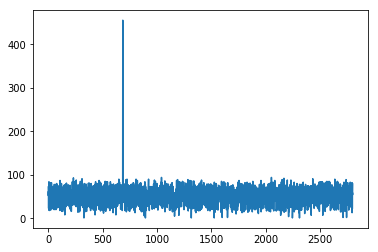

In [36]:
print(f"Vizualizácia extrémne odľahlých hodnôt v atribúte \"age\". Maximálna hodnota je {data['age'].max()}. Riešenie tohto problému by bolo túto hodnotu prepíšeme na najčastejšie sa vyskytujúcu hodnotu v tomto stĺpci.")
data["age"].plot(kind="line")


Nekonzistentné hodnoty v stĺpci "date_of_birth" - niektoré riadky majú len dátum, niektoré majú aj údaj o hodinách, niektoré majú NaN a pod... Stĺpce, ktoré obsahujú časový údaj na hodiny:minuty:sekundy musíme upraviť tak, aby tento údaj neobsahovali.

In [82]:
data["date_of_birth"]

0                1946-02-03
1                1965-08-27
2                1955-04-15
3                1994-03-26
4                1955-01-21
5                1961-12-10
6                1934-03-03
7                1949-07-21
8                1999-01-06
9                1945-11-10
10               1999-09-20
11                      NaN
12                      NaN
13               1970-09-28
14               1942-08-15
15               07/07/1973
16               1979-12-04
17               18/01/1940
18               15/10/1952
19               1981-07-19
20               1940-05-20
21               1957-04-28
22               1998-03-25
23               1935-11-23
24               1948-08-21
25               24/01/1942
26               1987-07-21
27      1983-09-21 00 00 00
28      1953-06-10 00:00:00
29               1935-08-10
               ...         
2770             1967-02-08
2771                    NaN
2772                     ??
2773             1969-06-16
2774             198

Hodnoty NaN v stĺpci "capital-gain". Tento problém by sme mohli riešiť, ak by sme hodnoty NaN nahradili pomocou modusu.

In [78]:
data["capital-gain"].unique()

array([    0.,    nan,  7688.,  7896., 99999.,  1173., 15024., 20051.,
        2228.,  7298.,  3325.,  2907., 15831.,  3942.,  4101.,  5178.,
        4650.,  4787.,  8614.,  1506.,  2829., 13550.,  5721.,   594.,
        3411.,  2977.,  2463., 14084.,  7430., 22040.,  2993.,  4064.,
        2346., 25236.,  6849.,  2174.,  3674.,  3137.,  1831.,  4386.,
        5013.,  2105.,  4687.,  2354.,  1111.,  6418.,  3103.,  3418.,
        4416.,  6723.,  2597.,  3464., 10520.,  2414.,  5455.,  3781.,
        6497.,  3908., 27828.,  1797.,  3273.,  7443.,  2176., 14344.,
        2036.,  2009.,  1055.,  2964., 15020.,  2290.,  1086.,  2202.])

Stĺpec s názvom "personal_info" by bolo dobré rozdeliť do viacero stĺpcov, pretože z tohto formátu nevyčítame nič. Jednotlivé vytvorené stĺpce budú mať názvy Profession, State, Family Status, Profession section???, Skin color. Potom bude treba vyriešiť aj problémy s chýbajúcimi dátami v týchto vytvorených stĺpcoch.

In [25]:
data["personal_info"].unique()

array(['Other-service|United-States\nWidowed -- private|Black',
       'Adm-clerical|United-States\nSeparated -- Local-gov|White',
       'Sales|United-States\nMarried-civ-spouse -- private|White',
       'Sales|United-States\nNever-married -- Private|Black',
       'Adm-clerical|United-States\nNever-married -- Private|White',
       '?|United-States\nNever-married -- ?|Black',
       'Adm-clerical|United-States\nWidowed -- Federal-gov|White',
       'Adm-clerical|Germany\nDivorced -- Private|White',
       'Sales|United-States\nNever-married -- Private|White',
       'Other-service|United-States\nNever-married -- Private|White',
       'Prof-specialty|United-States\nNever-married -- Self-emp-not-inc|White',
       'Prof-specialty|United-States\nNever-married -- Private|White',
       'Adm-clerical|United-States\nDivorced -- Private|Black',
       'Machine-op-inspct|United-States\nNever-married -- Private|White',
       'Exec-managerial|United-States\nNever-married -- Private|Black',
 

Pri počítaní jednotlivých hodnôt v stĺpci "relationship" sme narazili na problém s nekonzistentnými dátami. Musíme ich upraviť na takú podobu, aby jednotlivé slová neboli oddelené pomlčkoiu, ale podtržníkom, t.j. máme dve hodnoty - other-relative a other_relative, ktoré očividne vyjadrujú to isté, ale sú ináč zapísané.

In [30]:
data.groupby("relationship").size()

relationship
 Husband           550
 Not-in-family     809
 Not_in_family      95
 Other-relative     80
 Other_relative      9
 Own-child         441
 Own_child          53
 Unmarried         510
 Wife              253
dtype: int64

Tu vidíme vizualizáciu jednotlivých hodnôt v stĺpci "relationship"

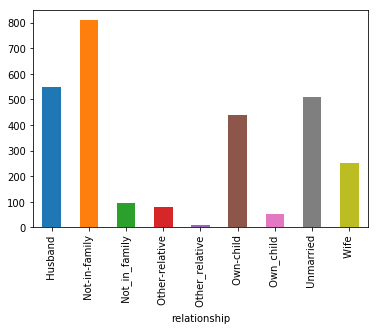

In [31]:
data.groupby("relationship").size().plot(kind="bar")

Tu vidíme počty jednotlivých hodnôt v stĺpci "education". V tomto stĺpci nenájdeme žiadne hodnoty, ktoré by vyzerali že vyjadrujú to isté ale sú zapísané ináč. Podobný výsledok chceme dostať aj pri stĺpci "relationship".

In [33]:
data.groupby("education").size()

education
 10th             79
 11th             97
 12th             54
 1st-4th          17
 5th-6th          24
 7th-8th          45
 9th              41
 Assoc-acdm      103
 Assoc-voc       130
 Bachelors       437
 Doctorate        25
 HS-grad         894
 Masters         138
 Preschool         4
 Prof-school      42
 Some-college    670
dtype: int64

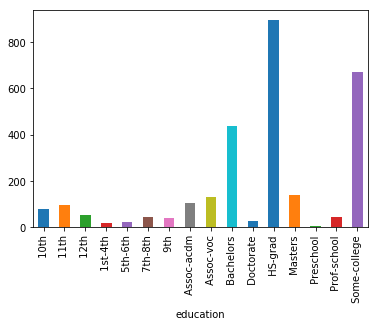

In [34]:
data.groupby("education").size().plot(kind="bar")

0    59.0
dtype: float64